## Step 1: Define K-Means Calculator

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

class KMeans_Calculator:
    def __init__(self, data):
        #Initialize the class
        self.data = data
        self.num_vals = None  #Placeholder 
        self.data_scaled = None  #Placeholder 
        self.centroids = None  #Placeholder 
        print('KMeans Defined. Proceed To Scale The Data')
        
    def show_data(self):
        #Display the input data
        display(self.data)
        display(self.num_vals)
        
    def scale_data(self):
        #Scale the data using StandardScaler
        self.num_vals = self.data.values  # Convert data to array format
        #Call instance of scaler
        scaler = StandardScaler()
        #Scale data
        self.data_scaled = scaler.fit_transform(self.num_vals)  
        print('Data Scaled. Proceed To The Elbow Test')
        
    def columns(self):
        # Print the column names of the df
        print(self.data.columns)
        
    def elbow_test(self):
        # Perform the Elbow Test to find the optimal number of clusters
        wcss=[]  # List to store the within-cluster sum of squares
        for i in range(1,8):
            #Fit KMeans for different number of clusters
            kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300, n_init=10,random_state=0)
            kmeans.fit(self.data_scaled)
            #Append the within-cluster sum of squares to the list
            wcss.append(kmeans.inertia_)
            
        #Plot the Elbow Method Graph
        plt.plot(range(1,8),wcss, marker = "o")
        plt.title('The Elbow Method Graph')  # Title of the plot
        plt.xlabel('Number of clusters')  # Label for x-axis
        plt.ylabel('WCSS')  # Label for y-axis
        plt.show()  # Show the plot
        print('Elbow Test Performed. Proceed To K-Means Analysis')
        
    def k_means_analysis(self, num_of_clusters):
        #Perform KMeans clustering with the specified number of clusters
        km = KMeans(n_clusters=num_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        # Fit and predict clusters
        clusters = km.fit_predict(self.data_scaled)  
        
        #Add the cluster labels to the original df
        self.data['Cluster#'] = clusters
        
        #Create a df that contains the centroids
        columns_list = self.data.columns[:-1].tolist()  # Exclude the 'Cluster#' column
        self.centroids = pd.DataFrame(km.cluster_centers_, columns=columns_list)
        self.centroids['cluster'] = ['Cluster {}'.format(i) for i in self.centroids.index]
        print("KMeans Analysis Completed. Proceed To Visualize The Charts")
        
    def visualize_analysis(self):
        # Visualize clusters plot the (centroids)
        plt.figure(figsize=(10, 6))
        parallel_coordinates(self.centroids, class_column='cluster', colormap='Dark2', linewidth=5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend position
       
        columns_list = self.data.columns[:-1].tolist()
        
        if len(columns_list) == 2:
            # Visualize clusters using scatter plot (plot the scatter)
            sns.lmplot(data=self.data, x=columns_list[0], y=columns_list[1], hue='Cluster#', fit_reg=False, legend=True)


## Step 2: Prepare Data
- Read Data
- Preprocess Data 

In [2]:
import pandas as pd
import os

data = pd.read_csv(os.path.join(os.getcwd(),'data_clean.csv'))

In [3]:
data.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,max_mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,38.0,Black,Parchment,0.0,0.0,0.0,Iconic Coach,0.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,38.0,Gray,Ebony,1.0,1.0,1.0,Kars Today,0.0,0.0,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,38.0,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,62042.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,38.0,Polished Metal Metallic,Ebony,0.0,0.0,1.0,Kalidy Kia,2.2,109.0,18000.0
4,Acura,ILX Hybrid 1.5L,2013,57212.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,38.0,Silver,Ebony,0.0,1.0,1.0,Ohio Car Mart,0.0,0.0,15999.0


In [4]:
#you need numerical varaibles to conduct cluster analyis (float)
data.dtypes
#Create a new df with only float columns
float_df = data.select_dtypes(include=['float64'])

In [5]:
float_df

,mileage,max_mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,price_drop,price
0,92945.0,38.0,0.0,0.0,0.0,0.0,300.0,13988.0
1,47645.0,38.0,1.0,1.0,1.0,0.0,0.0,17995.0
2,53422.0,38.0,0.0,1.0,1.0,4.3,500.0,17000.0
3,62042.0,38.0,0.0,0.0,1.0,2.2,109.0,18000.0
4,57212.0,38.0,0.0,1.0,1.0,0.0,0.0,15999.0
...,...,...,...,...,...,...,...,...
566811,26781.0,34.0,1.0,1.0,1.0,5.0,1108.0,30883.0
566812,22877.0,33.0,0.0,1.0,0.0,4.2,250.0,34798.0
566813,92000.0,30.0,0.0,0.0,1.0,0.0,300.0,12299.0
566814,132000.0,29.0,1.0,0.0,0.0,4.6,1000.0,8995.0


## Step 3: Perform K-means Cluster Analysis
- 1. Perform Analysis On Price and Mileage
- 2. Perform Analysis On Price Drop and Price
- 3. Perform Analysis On Price and Price Drop
- 4. Perform Analysis On Max_Mpg, Price, Mileage, and Price Drop

#### 1. Analysis On Price And Mileage

In [6]:
price_mileage = KMeans_Calculator(float_df[['price', 'mileage']])

KMeans Defined. Proceed To Scale The Data


In [7]:
price_mileage.scale_data()

Data Scaled. Proceed To The Elbow Test


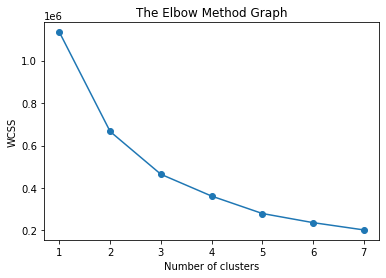

Elbow Test Performed. Proceed To K-Means Analysis


In [8]:
price_mileage.elbow_test()

In [9]:
price_mileage.k_means_analysis(2)

KMeans Analysis Completed. Proceed To Visualize The Charts


C:\Users\12034\AppData\Local\Temp\ipykernel_19824\2868534539.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Cluster#'] = clusters


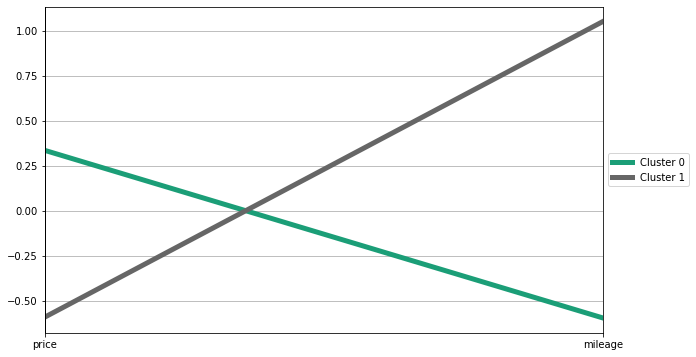

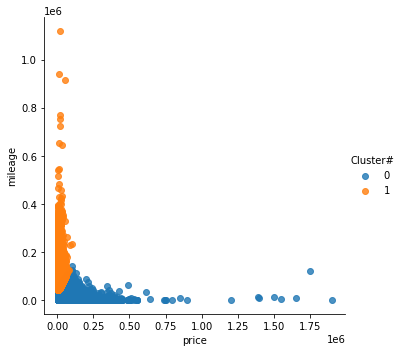

In [10]:
price_mileage.visualize_analysis()

#### 2. Analysis On Price Drop And Price

In [11]:
price_pricedrop = KMeans_Calculator(float_df[['price', 'price_drop']])

KMeans Defined. Proceed To Scale The Data


Data Scaled. Proceed To The Elbow Test


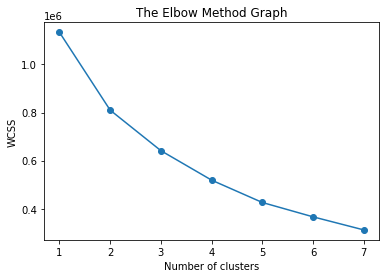

Elbow Test Performed. Proceed To K-Means Analysis


In [12]:
price_pricedrop.scale_data()
price_pricedrop.elbow_test()

C:\Users\12034\AppData\Local\Temp\ipykernel_19824\2868534539.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Cluster#'] = clusters


KMeans Analysis Completed. Proceed To Visualize The Charts


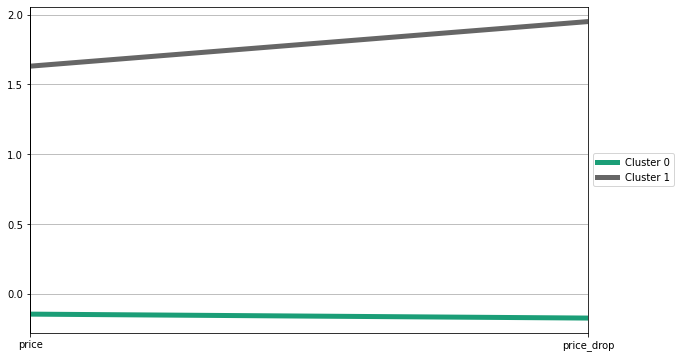

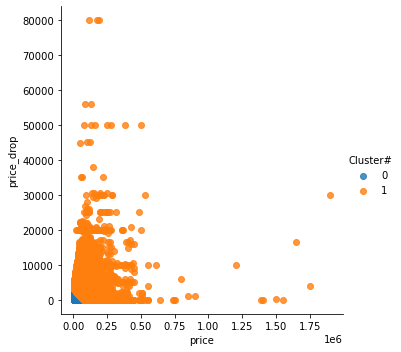

In [13]:
price_pricedrop.k_means_analysis(2)
price_pricedrop.visualize_analysis()

#### 3. Analysis On Mileage, And Price Drop

In [14]:
mileage_pricedrop = KMeans_Calculator(float_df[['mileage', 'price_drop']])

KMeans Defined. Proceed To Scale The Data


Data Scaled. Proceed To The Elbow Test


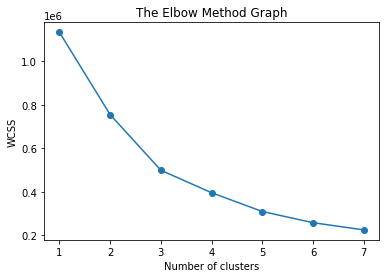

Elbow Test Performed. Proceed To K-Means Analysis


In [15]:
mileage_pricedrop.scale_data()
mileage_pricedrop.elbow_test()

C:\Users\12034\AppData\Local\Temp\ipykernel_19824\2868534539.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Cluster#'] = clusters


KMeans Analysis Completed. Proceed To Visualize The Charts


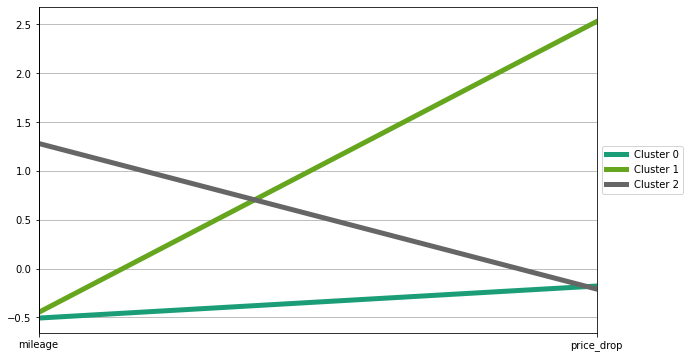

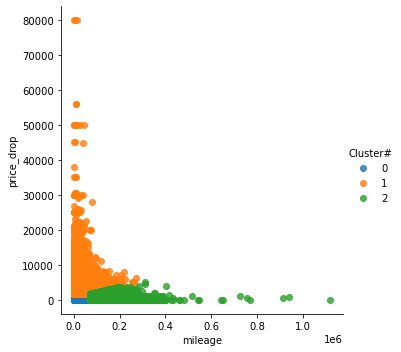

In [16]:
mileage_pricedrop.k_means_analysis(3)
mileage_pricedrop.visualize_analysis()

#### 4. Analysis On All Automobile Factors: Max_Mpg, Mileage, Price_Drop, And Price

In [17]:
All = KMeans_Calculator(float_df[['max_mpg','mileage', 'price_drop','price']])

KMeans Defined. Proceed To Scale The Data


Data Scaled. Proceed To The Elbow Test


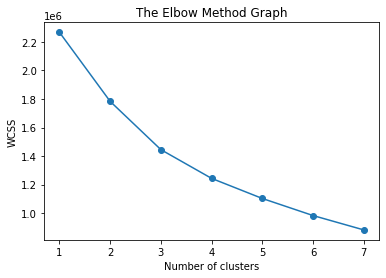

Elbow Test Performed. Proceed To K-Means Analysis


In [18]:
All.scale_data()
All.elbow_test()

KMeans Analysis Completed. Proceed To Visualize The Charts


C:\Users\12034\AppData\Local\Temp\ipykernel_19824\2868534539.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Cluster#'] = clusters


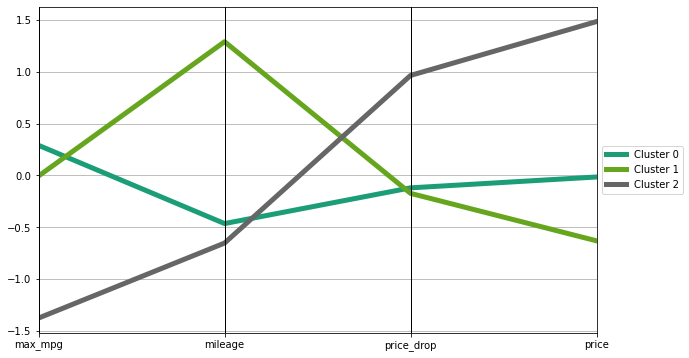

In [19]:
All.k_means_analysis(3)
All.visualize_analysis()